# Linear Regression with Python Scikit Learn.

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author: Ashutosh Tiwari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataurl = 'http://bit.ly/w-data'
df = pd.read_csv(dataurl)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

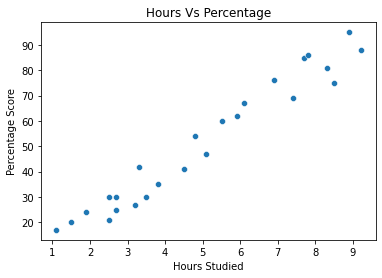

In [3]:
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)
print('Training Complete')

Training Complete


In [7]:
lm.coef_

array([9.77580339])

In [8]:
lm.intercept_

2.483673405373196

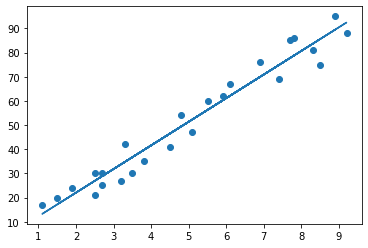

In [9]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test)
y_predict = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
df2 = pd.DataFrame({'Actual':y_test, 'Predict Value':y_predict})

In [12]:
df2

,Actual,Predict Value
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [13]:
# You can also test with your own data
hours = 8.50
own_pred = lm.predict(np.array(hours).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8.5
Predicted Score = 85.5780022270667


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error. There are many such metrics.

In [14]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_predict))


4.071877793635608
